## Questions 6

### Implementing the function without using built-in function

    This is a GraphEdge class
    self.node denotes node from where the node is generating
    self.distance is the weight for the edge

In [2]:
class GraphEdge(object):
    def __init__(self, node, distance):
        self.node = node
        self.distance = distance

        I have used math built-in fuction just to give 'infinity' weight to the edge 
        Here add_child is same as add node
        Here remove_node is same as remove node
        

In [3]:
import math
class GraphNode(object):
    def __init__(self, val):
        self.value = val
        self.edges = []

    def add_child(self, node, distance):
        self.edges.append(GraphEdge(node, distance))

    def remove_child(self, del_node):
        if del_node in self.edges:
            self.edges.remove(del_node)

class Graph(object):
    def __init__(self, node_list):
        self.nodes = node_list

    def add_edge(self, node1, node2, distance):
        if node1 in self.nodes and node2 in self.nodes:
            node1.add_child(node2, distance)
            node2.add_child(node1, distance)

    def remove_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            node1.remove_child(node2)
            node2.remove_child(node1)

# Graph used

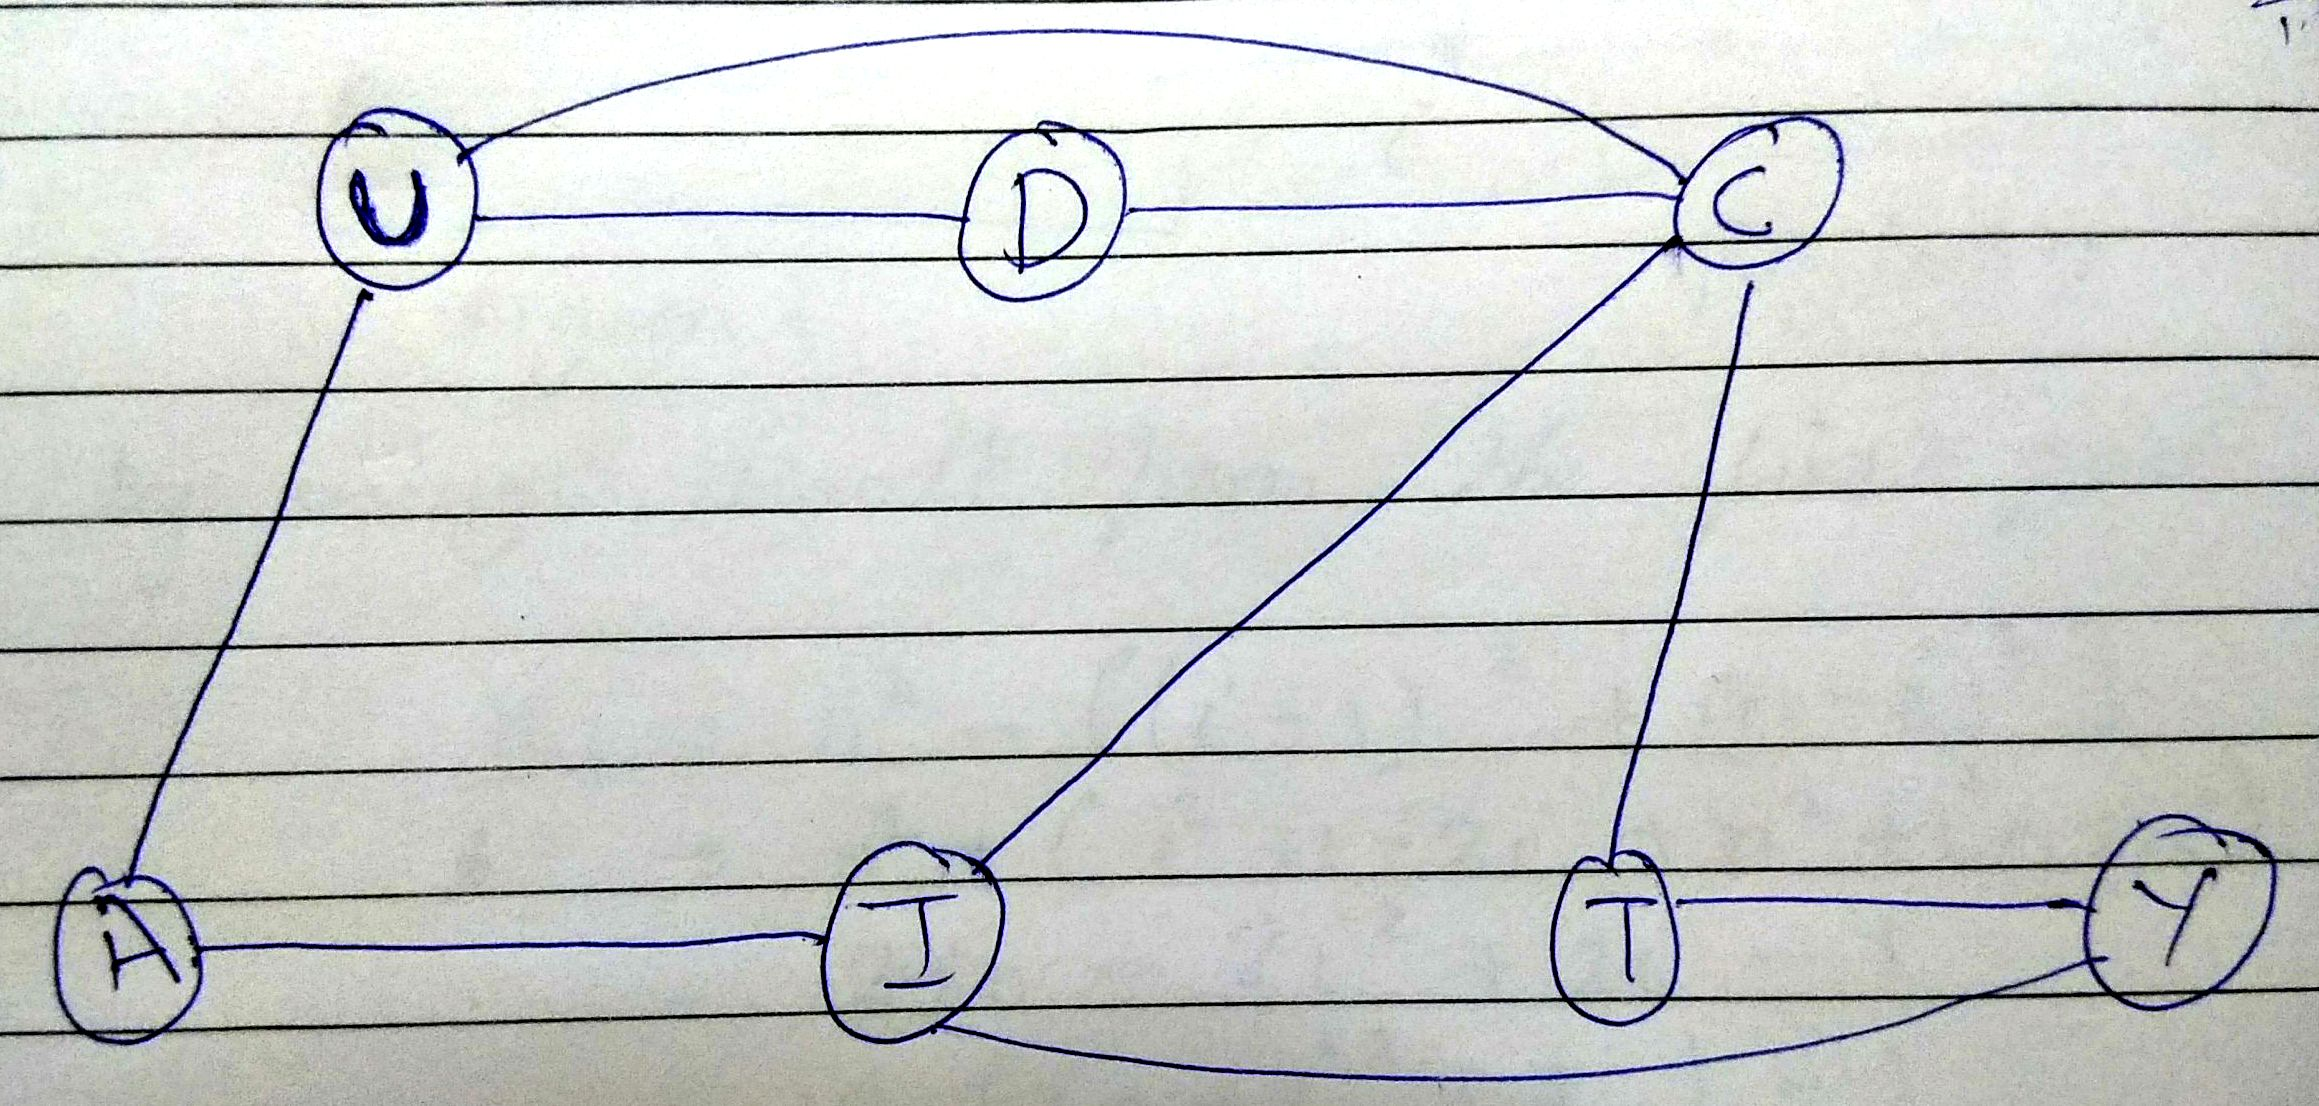

Creating the graph as shown in the above image

In [4]:
node_u = GraphNode('U')
node_d = GraphNode('D')
node_a = GraphNode('A')
node_c = GraphNode('C')
node_i = GraphNode('I')
node_t = GraphNode('T')
node_y = GraphNode('Y')

graph = Graph([node_u, node_d, node_a, node_c, node_i, node_t, node_y])
graph.add_edge(node_u, node_a, 1)
graph.add_edge(node_u, node_c, 1)
graph.add_edge(node_u, node_d, 1)
graph.add_edge(node_d, node_u, 1)
graph.add_edge(node_d, node_c, 1)
graph.add_edge(node_a, node_u, 1)
graph.add_edge(node_a, node_i, 1)
graph.add_edge(node_c, node_d, 1)
graph.add_edge(node_c, node_u, 1)
graph.add_edge(node_c, node_i, 1)
graph.add_edge(node_c, node_t, 1)
graph.add_edge(node_i, node_a, 1)
graph.add_edge(node_i, node_c, 1)
graph.add_edge(node_i, node_y, 1)
graph.add_edge(node_t, node_c, 1)
graph.add_edge(node_t, node_y, 1)
graph.add_edge(node_y, node_i, 1)
graph.add_edge(node_y, node_t, 1)

## Logic

I have used dijkstra alogrithm to find smallest distance between two node.
Dijkstra uses edges weight to find the cheapest path. SO I have given weight of "1"
to each edge. So weighted graph with all edgeweight of 1 is same as undirected
unweighted graph

In [5]:
def dijkstra(start_node, end_node):
    distance_dict = {node: math.inf for node in graph.nodes}
    shortest_path_to_node = {}

    distance_dict[start_node] = 0
    while distance_dict:
        # Pop the shorest path 
        current_node, node_distance = sorted(distance_dict.items(), key=lambda x: x[1])[0]
        shortest_path_to_node[current_node] = distance_dict.pop(current_node)

        for edge in current_node.edges:
            if edge.node in distance_dict:
                new_node_distance = node_distance + edge.distance
                if distance_dict[edge.node] > new_node_distance:
                    distance_dict[edge.node] = new_node_distance
    
    return shortest_path_to_node[end_node]

In [6]:
def using_dijkstra():
    nodes = [node_a, node_c, node_d, node_i, node_t, node_u, node_y]
    closeness_centrality_dict = dict()
    for node1 in nodes:
        d=0
        for node2 in nodes:
            if node1 != node2:
                #print('Shortest Distance from {} to {} is {}'.format(node1.value, node2.value, dijkstra(node1, node2)))
                d+=1/dijkstra(node1, node2)

        closeness_centrality_dict[node1.value] = (1/(len(nodes)-1))*d

        #print('d=',d)
    #print(closeness_centrality_dict)
    return closeness_centrality_dict
    
        

## Creating the graph using built-in Library

In [7]:
import networkx as nx
g = nx.Graph()
g.add_edge('U','D')
g.add_edge('U','C')
g.add_edge('U','A')
g.add_edge('D','C')
g.add_edge('U','D')
g.add_edge('A','I')
g.add_edge('C','I')
g.add_edge('C','T')
g.add_edge('T','Y')
g.add_edge('I','Y')

This fuction return a dictionary of node with their closeness centrality

In [8]:
def using_built_in_library(graph):
    return nx.closeness_centrality(graph)
    

## Sorting the node based on the centrality, if their is a tie then sorting those elements based on node name alphabatically

In [9]:
# array of sorted (node, centrality) which are created by using user defined function
#based on centrality
sorted_node_by_dij = sorted(using_dijkstra().items(), key=lambda x: (x[1],x[0])) 

In [10]:
# array of sorted (node, centrality) which are created by using built-in function
#based on centrality
sorted_builtin_node = sorted(using_built_in_library(g).items(), key=lambda x: (x[1],x[0]))

## Final Testing
### Checking if the list generate by user-defined function and built-in function are same or not



In [12]:

def print_node_with_closeness_centrality(node_list,node_dict):
    for node in node_list:
        print(f"Node {node} has closeness centrality {node_dict[node]}")

        
sorted_node_list_1 = [i[0] for i in sorted_node_by_dij]
sorted_node_list_2 = [i[0] for i in sorted_builtin_node]
if sorted_node_list_1==sorted_node_list_2:
    print('Test Pass ') 
    print('')
    print('Closeness Centrality generated by user-defined Function')
    print('')
    print_node_with_closeness_centrality(sorted_node_list_1,dict(sorted_node_by_dij))
    print('----------------------------------------------------------------')
    print('')
    print('Closeness Centrality generated by built-in Function')
    print('')
    print_node_with_closeness_centrality(sorted_node_list_2,dict(sorted_builtin_node))
    
else:
    print('Test fail')
    print('')
    print('Closeness Centrality generated by user-defined Function')
    print('')
    print_node_with_closeness_centrality(sorted_node_list_1,dict(sorted_node_by_dij))
    print('----------------------------------------------------------------')
    print('')
    print('Closeness Centrality generated by built-in Function')
    print('')
    print_node_with_closeness_centrality(sorted_node_list_2,dict(sorted_builtin_node))
    


Test Pass 

Closeness Centrality generated by user-defined Function

Node Y has closeness centrality 0.611111111111111
Node A has closeness centrality 0.6388888888888888
Node D has closeness centrality 0.6388888888888888
Node T has closeness centrality 0.6388888888888888
Node U has closeness centrality 0.7222222222222221
Node I has closeness centrality 0.75
Node C has closeness centrality 0.8333333333333333
----------------------------------------------------------------

Closeness Centrality generated by built-in Function

Node Y has closeness centrality 0.5
Node A has closeness centrality 0.5454545454545454
Node D has closeness centrality 0.5454545454545454
Node T has closeness centrality 0.5454545454545454
Node U has closeness centrality 0.6
Node I has closeness centrality 0.6666666666666666
Node C has closeness centrality 0.75
